1. Import and Install Dependencies

In [2]:
!pip install tensorflow opencv-python sklearn matplotlib mediapipe

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import mediapipe as mp
import time
import os

2. Setup MP Holistic and MP Drawing to detect and draw lanmarks

In [7]:
#importing access to pre-trained models and drawing utilities in the mediapipe library

mp_holistic = mp.solutions.holistic      # givig acess to holistic model for detecting landmarks
mp_drawing = mp.solutions.drawing_utils  #drawing utilities for drawing landmarks

In [8]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # color conversion, from BGR to RGN
    image.flags.writeable = False                     # image is no longer writable, locks the image to keep it unchanged during processing
    results = model.process(image)                    # make prediction
    image.flags.writeable = True                      # image is no writable! you can draw land marks in it 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # color conversion, from RGB to BGR
    return image, results

In [9]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS)    #Draw fae landmarks
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)     #Draw pose landmarks   
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)#Draw left hand landmarks
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)# Draw right hand landmarks
    

In [162]:
cap = cv2.VideoCapture(0)
# creat an instance of holistic model so it can process images
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        #read feed
        ret, frame = cap.read()

        #make detection, detected landmarks are in results
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        #Draw landmarks
        draw_landmarks(image, results)

        #show to screen
        cv2.imshow('OpenCV video', image)

        #Break gracefully
        if cv2.waitKey(10) & 0xFF ==ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

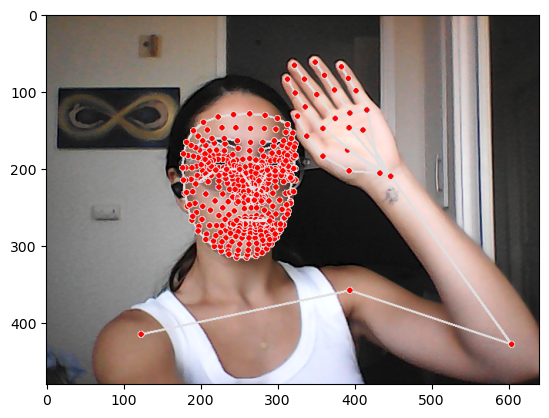

In [163]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [164]:
results

mediapipe.python.solution_base.SolutionOutputs

In [165]:
len(results.left_hand_landmarks.landmark)

21

3. Extract Keypoint Values

In [166]:
# accessing the last frames landmarks through the results variable
results.pose_landmarks.landmark

[x: 0.42680636048316956
y: 0.48787009716033936
z: -0.7982303500175476
visibility: 0.9999915361404419
, x: 0.4494573175907135
y: 0.4221349358558655
z: -0.70335453748703
visibility: 0.999984085559845
, x: 0.46422824263572693
y: 0.42299121618270874
z: -0.703008770942688
visibility: 0.9999855160713196
, x: 0.4797969460487366
y: 0.4235421419143677
z: -0.702369213104248
visibility: 0.9999843239784241
, x: 0.3926007151603699
y: 0.4198470413684845
z: -0.7458709478378296
visibility: 0.9999824166297913
, x: 0.3657509982585907
y: 0.4199167490005493
z: -0.7452643513679504
visibility: 0.999981701374054
, x: 0.34401386976242065
y: 0.42110776901245117
z: -0.745529055595398
visibility: 0.9999754428863525
, x: 0.49562373757362366
y: 0.44329768419265747
z: -0.20099225640296936
visibility: 0.9999887347221375
, x: 0.3039555549621582
y: 0.45858246088027954
z: -0.3910835385322571
visibility: 0.9999865889549255
, x: 0.4541512131690979
y: 0.5603412389755249
z: -0.6173139214515686
visibility: 0.999985098838806

In [167]:
# we need to add all the landmarks of each frame/image to be inside an array in order to train our model with it, now we test how we can sent just pose_landmarks to an array:
# we use flatten to create one big array
#all of these landmarks are from the last frame that webcam captured

pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
right_hand = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
left_hand = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)

In [168]:
pose.shape

(132,)

In [169]:
right_hand

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [170]:
left_hand

array([ 6.77982867e-01,  4.29411590e-01,  2.93372665e-07,  6.14190459e-01,
        4.24944222e-01, -1.85249783e-02,  5.61496615e-01,  3.85096639e-01,
       -2.43552048e-02,  5.29057920e-01,  3.29201192e-01, -2.98779737e-02,
        5.10116935e-01,  2.76303709e-01, -3.45109664e-02,  5.61868668e-01,
        3.09852958e-01,  1.99415325e-03,  5.26040316e-01,  2.51347959e-01,
       -1.23581570e-02,  5.06176949e-01,  2.13655740e-01, -2.60373484e-02,
        4.90063787e-01,  1.77078009e-01, -3.60642560e-02,  5.86961865e-01,
        2.82281727e-01,  1.10268651e-04,  5.48953056e-01,  2.18177646e-01,
       -1.18428292e-02,  5.24717033e-01,  1.75991699e-01, -2.53827032e-02,
        5.03566742e-01,  1.37574539e-01, -3.52288894e-02,  6.16500735e-01,
        2.67113686e-01, -6.11557160e-03,  5.85007608e-01,  2.04970211e-01,
       -2.01419983e-02,  5.65168560e-01,  1.64929688e-01, -2.98293103e-02,
        5.46692550e-01,  1.29579216e-01, -3.59594487e-02,  6.50693417e-01,
        2.59929180e-01, -

In [139]:
results.face_landmarks

[x: 0.3348580598831177
y: 0.5942186713218689
z: -0.035563115030527115
, x: 0.3352242708206177
y: 0.541111409664154
z: -0.05530853569507599
, x: 0.332655131816864
y: 0.5589565634727478
z: -0.03109157085418701
, x: 0.32012999057769775
y: 0.4962340295314789
z: -0.03974014148116112
, x: 0.33450639247894287
y: 0.5259084105491638
z: -0.05796749144792557
, x: 0.331920325756073
y: 0.5072684288024902
z: -0.05253550037741661
, x: 0.3241618573665619
y: 0.46382617950439453
z: -0.02046443521976471
, x: 0.24102741479873657
y: 0.4730205237865448
z: 0.008107153698801994
, x: 0.3202064335346222
y: 0.42664527893066406
z: -0.010500749573111534
, x: 0.3190643787384033
y: 0.4059699773788452
z: -0.010865453630685806
, x: 0.31233733892440796
y: 0.3353213667869568
z: 0.006485773250460625
, x: 0.3351624011993408
y: 0.6019973754882812
z: -0.034569453448057175
, x: 0.3348904252052307
y: 0.6083927154541016
z: -0.03124801255762577
, x: 0.33420529961586
y: 0.6115468740463257
z: -0.02677229791879654
, x: 0.334694117

In [140]:
len(results.face_landmarks.landmark)

468

In [10]:
#putting extracting landmarks in a function, giving the results which contains landmarks of the last image and put it in one array
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    right_hand = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    left_hand = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, right_hand, left_hand])

In [11]:
landmarks = extract_keypoints(results)
landmarks

NameError: name 'results' is not defined

In [178]:
len(landmarks)

1662

4. Setup Folders for Collection

In [12]:
#path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data')

#actions that we try to detect
actions = np.array(["hello", "thanks", "please"])

#thirty videos worth of data
no_sequence = 30

#videos are going to be 30 frames in length
sequence_length = 30

In [221]:
for action in actions: 
    for sequence in range(no_sequence):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [222]:
os.getcwd()

'C:\\Users\\Asus'

5. Collecting keypoints values for training and testing

In [223]:
cap = cv2.VideoCapture(0)
# creat an instance of holistic model so it can process images
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    ###loop through actions
    for action in actions:
        #loop through sequence of videos
        for sequence in range(no_sequence):
            #loop through each frame/image in each video
            for frame_num in range(sequence_length):
                
                #read feed
                ret, frame = cap.read()

                #make detection, detected landmarks are in results
                image, results = mediapipe_detection(frame, holistic)
                print(results)                 

                #Draw landmarks
                draw_landmarks(image, results)
                
                ###Apply wait logic, showing some text for user, giving some break to give time to prepare
                if frame_num == 0:
                    cv2.putText(image, "STARTING COLLECTION", (120,200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, "Collecting frames for {} video number {}".format(action, sequence), (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, "Collecting frames for {} video number {}".format(action, sequence), (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                
                ### save keypoints into arras
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                    
                #show to screen
                cv2.imshow('OpenCV video', image)
                
                

                #Break gracefully
                if cv2.waitKey(10) & 0xFF ==ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows() 

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [207]:
cap.release()
cv2.destroyAllWindows()

6. preprocess data and create labels and features

In [13]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [225]:
#labeling items in action, each item in actions gets a unique number
label_map = {label:num for num, label in enumerate(actions)}

In [226]:
label_map

{'hello': 0, 'thanks': 1, 'please': 2}

In [229]:
#now lets add each of the frames together to vreate the whole vifdeo and save it into windoes and save that into sequences to have videos for each action, also add their label map of each video to the label map 
sequences, label = [], []
for action in actions:
    for sequence in range(no_sequence):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        label.append(label_map[action])

In [230]:
sequences

[[array([ 0.65058023,  0.42164791, -1.16047251, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.62882918,  0.44854715, -1.17755747, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.6130054 ,  0.46016046, -1.17690086, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.60897815,  0.46337658, -1.16389024, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.6111595 ,  0.46923998, -1.14287913, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.61271447,  0.46886763, -1.14506483, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.61309922,  0.46900794, -1.15077126, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.62056363,  0.47027051, -1.18086398, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.6392625 ,  0.47353849, -1.19831848, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.64564186,  0.47893667, -1.19672978, ...,  0.        ,
       

In [231]:
np.array(sequences).shape #90 videos each 30 videos and each 1662 keypoints

(90, 30, 1662)

In [27]:
# we store in in x to be easier to work with
x = np.array(sequences)

NameError: name 'sequences' is not defined

In [26]:
x

NameError: name 'x' is not defined

In [244]:
# cinverting labelt to one hot incoded representaion and store it in y
y = to_categorical(label).astype(int)

In [245]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [246]:
# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05)


In [247]:
x_train.shape

(85, 30, 1662)

In [248]:
x_test.shape

(5, 30, 1662)

In [249]:
y_train.shape

(85, 3)

In [250]:
y_test.shape

(5, 3)

7. build and train our LSTM neural network

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [258]:
#for monitoring your neural network training and its accuracy you use tensorboard
log_dir = os.path.join("logs")
tb_callback = TensorBoard(log_dir=log_dir)

In [20]:
#lets build our neural network    
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [264]:
actions.shape[0]

3

In [21]:
#compiling our model
model.compile(optimizer='Adam', loss="categorical_crossentropy", metrics=['categorical_accuracy'])

In [270]:
#fit and train our model
model.fit(x_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 6s 87ms/step - loss: 7.0981 - categorical_accuracy: 0.2706
Epoch 2/2000
3/3 [==============================] - 0s 79ms/step - loss: 2.5595 - categorical_accuracy: 0.3647
Epoch 3/2000
3/3 [==============================] - 0s 79ms/step - loss: 2.8111 - categorical_accuracy: 0.4235
Epoch 4/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.1757 - categorical_accuracy: 0.3765
Epoch 5/2000
3/3 [==============================] - 0s 71ms/step - loss: 1.1962 - categorical_accuracy: 0.4588
Epoch 6/2000
3/3 [==============================] - 0s 85ms/step - loss: 2.8172 - categorical_accuracy: 0.4588
Epoch 7/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.6758 - categorical_accuracy: 0.4706
Epoch 8/2000
3/3 [==============================] - 0s 78ms/step - loss: 83.0475 - categorical_accuracy: 0.1647
Epoch 9/2000
3/3 [==============================] - 0s 85ms/step - loss: 5.6945 - categorical_accuracy: 0.2706


3/3 [==============================] - 0s 79ms/step - loss: 7.1533 - categorical_accuracy: 0.2941
Epoch 74/2000
3/3 [==============================] - 0s 81ms/step - loss: 13.4008 - categorical_accuracy: 0.3529
Epoch 75/2000
3/3 [==============================] - 0s 82ms/step - loss: 8.4061 - categorical_accuracy: 0.3059
Epoch 76/2000
3/3 [==============================] - 0s 81ms/step - loss: 5.1394 - categorical_accuracy: 0.4824
Epoch 77/2000
3/3 [==============================] - 0s 84ms/step - loss: 6.7889 - categorical_accuracy: 0.3294
Epoch 78/2000
3/3 [==============================] - 0s 83ms/step - loss: 3.4178 - categorical_accuracy: 0.3765
Epoch 79/2000
3/3 [==============================] - 0s 89ms/step - loss: 5.5249 - categorical_accuracy: 0.3647
Epoch 80/2000
3/3 [==============================] - 0s 80ms/step - loss: 6.5177 - categorical_accuracy: 0.4353
Epoch 81/2000
3/3 [==============================] - 0s 86ms/step - loss: 6.3721 - categorical_accuracy: 0.4353
Epoch

3/3 [==============================] - 0s 72ms/step - loss: 5.0473 - categorical_accuracy: 0.3647
Epoch 146/2000
3/3 [==============================] - 0s 78ms/step - loss: 2.7535 - categorical_accuracy: 0.5647
Epoch 147/2000
3/3 [==============================] - 0s 66ms/step - loss: 2.3277 - categorical_accuracy: 0.5882
Epoch 148/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.5357 - categorical_accuracy: 0.4588
Epoch 149/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.4545 - categorical_accuracy: 0.5176
Epoch 150/2000
3/3 [==============================] - 0s 76ms/step - loss: 1.8125 - categorical_accuracy: 0.6353
Epoch 151/2000
3/3 [==============================] - 0s 82ms/step - loss: 2.8157 - categorical_accuracy: 0.4471
Epoch 152/2000
3/3 [==============================] - 0s 78ms/step - loss: 2.4633 - categorical_accuracy: 0.3412
Epoch 153/2000
3/3 [==============================] - 0s 71ms/step - loss: 4.0865 - categorical_accuracy: 0.388

3/3 [==============================] - 0s 76ms/step - loss: 4.5979 - categorical_accuracy: 0.5294
Epoch 218/2000
3/3 [==============================] - 0s 75ms/step - loss: 4.4800 - categorical_accuracy: 0.6118
Epoch 219/2000
3/3 [==============================] - 0s 90ms/step - loss: 6.8340 - categorical_accuracy: 0.4353
Epoch 220/2000
3/3 [==============================] - 0s 80ms/step - loss: 6.3915 - categorical_accuracy: 0.3647
Epoch 221/2000
3/3 [==============================] - 0s 72ms/step - loss: 7.3593 - categorical_accuracy: 0.3294
Epoch 222/2000
3/3 [==============================] - 0s 74ms/step - loss: 5.7008 - categorical_accuracy: 0.4000
Epoch 223/2000
3/3 [==============================] - 0s 80ms/step - loss: 5.9572 - categorical_accuracy: 0.3765
Epoch 224/2000
3/3 [==============================] - 0s 78ms/step - loss: 4.0089 - categorical_accuracy: 0.3882
Epoch 225/2000
3/3 [==============================] - 0s 75ms/step - loss: 2.8733 - categorical_accuracy: 0.600

3/3 [==============================] - 0s 72ms/step - loss: 0.2087 - categorical_accuracy: 0.9294
Epoch 290/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.2416 - categorical_accuracy: 0.9176
Epoch 291/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.1956 - categorical_accuracy: 0.9412
Epoch 292/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.1944 - categorical_accuracy: 0.9294
Epoch 293/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.1837 - categorical_accuracy: 0.9529
Epoch 294/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.2206 - categorical_accuracy: 0.9059
Epoch 295/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.1996 - categorical_accuracy: 0.9176
Epoch 296/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.1955 - categorical_accuracy: 0.9412
Epoch 297/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.2708 - categorical_accuracy: 0.89

3/3 [==============================] - 0s 79ms/step - loss: 0.2963 - categorical_accuracy: 0.8824
Epoch 362/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.4686 - categorical_accuracy: 0.8824
Epoch 363/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.1443 - categorical_accuracy: 0.7412
Epoch 364/2000
3/3 [==============================] - 0s 78ms/step - loss: 2.2215 - categorical_accuracy: 0.7176
Epoch 365/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.9720 - categorical_accuracy: 0.6824
Epoch 366/2000
3/3 [==============================] - 0s 76ms/step - loss: 1.5473 - categorical_accuracy: 0.7882
Epoch 367/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.8633 - categorical_accuracy: 0.7882
Epoch 368/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.4342 - categorical_accuracy: 0.8941
Epoch 369/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.6125 - categorical_accuracy: 0.882

3/3 [==============================] - 0s 78ms/step - loss: 0.2256 - categorical_accuracy: 0.9412
Epoch 434/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.2521 - categorical_accuracy: 0.9059
Epoch 435/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.2125 - categorical_accuracy: 0.9294
Epoch 436/2000
3/3 [==============================] - 0s 89ms/step - loss: 0.1742 - categorical_accuracy: 0.9294
Epoch 437/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.1699 - categorical_accuracy: 0.9294
Epoch 438/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.1357 - categorical_accuracy: 0.9412
Epoch 439/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.1704 - categorical_accuracy: 0.9412
Epoch 440/2000
3/3 [==============================] - 0s 83ms/step - loss: 0.1188 - categorical_accuracy: 0.9412
Epoch 441/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.1683 - categorical_accuracy: 0.929

3/3 [==============================] - 0s 75ms/step - loss: 0.1201 - categorical_accuracy: 0.9412
Epoch 506/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.1119 - categorical_accuracy: 0.9529
Epoch 507/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.1601 - categorical_accuracy: 0.9529
Epoch 508/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.1638 - categorical_accuracy: 0.9529
Epoch 509/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.1200 - categorical_accuracy: 0.9529
Epoch 510/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.1490 - categorical_accuracy: 0.9529
Epoch 511/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.0859 - categorical_accuracy: 0.9529
Epoch 512/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.1326 - categorical_accuracy: 0.9412
Epoch 513/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.2040 - categorical_accuracy: 0.952

KeyboardInterrupt: 

In [271]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_7 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_8 (LSTM)               (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596675 (2.28 MB)
Trainable params: 59667

8. make prediction

In [273]:
res = model.predict(x_test)

1/1 [==============================] - 0s 46ms/step


In [282]:
actions[np.argmax(res[3])]

'please'

In [283]:
actions[np.argmax(y_test[3])]

'please'

9.save model

In [285]:
model.save('actions.hs')

INFO:tensorflow:Assets written to: actions.hs\assets


INFO:tensorflow:Assets written to: actions.hs\assets


In [24]:
#load model
model.load_weights('actions.hs')

10. evaluation using confusion matrix and accuracy

In [291]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [295]:
yhat = model.predict(x_test)

1/1 [==============================] - 0s 48ms/step


In [296]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [298]:
multilabel_confusion_matrix(yhat, ytrue)

array([[[4, 0],
        [0, 1]],

       [[1, 0],
        [0, 4]]], dtype=int64)

In [299]:
accuracy_score(ytrue, yhat)

1.0

10. prediction in real time

In [25]:
sequence = []     #this will collect 30 frames in order to be able to generate a prediction 
sentence = []     # concatinate our history of prediction together to be able to generate a sentence
threshold = 0.4   # this is our confidence metrix, we only gonna render a result if they are above this threshold

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)
        
        ### Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        ### Visualization logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 42ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 44ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 41ms/step
thanks
<class 'mediapipe.p

1/1 [==============================] - 0s 34ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
please
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
please
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
please
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
please
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 41ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
thanks
<class 'media

1/1 [==============================] - 0s 46ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
hello


In [17]:
cap.release()
cv2.destroyAllWindows()